In [75]:
import numpy as np
import pandas as pd
import random
import networkx as nx
from networkx.algorithms.shortest_paths.generic import shortest_path_length as pathwalk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot as plt

In [252]:
Data = pd.read_csv('/Users/mac/Desktop/Project1/partial.csv')
Test = pd.read_csv('/Users/mac/Desktop/Project1/test.csv')
Train = pd.read_csv('/Users/mac/Desktop/Project1/train_sample.csv')

In [253]:
print(Data) #24002361 rows x 2 columns
print(Test) #2000 rows x 3 columns
print(Train) #4000 rows x 3 columns

           node_1   node_2
0          540762  1912140
1          540762  1537559
2          540762  3091331
3          540762  2757277
4          540762  3237295
...           ...      ...
24002356  3547024  1075576
24002357  3547024  4549841
24002358  3547024  1135647
24002359  3547024   807274
24002360  3547024  3897045

[24002361 rows x 2 columns]
        Id   source     sink
0        1  3563811  3600160
1        2  2052043  1401960
2        3  4517994  1690636
3        4  1660006  4349447
4        5   581111  1882617
...    ...      ...      ...
1995  1996  1461386  2341683
1996  1997  4057755  1871227
1997  1998  4242514  1413468
1998  1999   555531  1290080
1999  2000  1707829  2373045

[2000 rows x 3 columns]
         from       in  label
0     2893327  4331696      1
1      455376  4697286      1
2      544230   521586      1
3     4238001  1870577      1
4     1249227  1024872      1
...       ...      ...    ...
4495  4086455  2011407      0
4496  3464362  3048234      0
4497

In [254]:
#source = list(Test.source)
#source
#sink = list(Test.sink)
#node_test = (source,sink)
#node_test = np.array((source,sink)))
node_test = np.array(Test[['source','sink']])
node_test

node_train = np.array(Train[['from','in']])
node_train

array([[2893327, 4331696],
       [ 455376, 4697286],
       [ 544230,  521586],
       ...,
       [3795799, 1714468],
       [3595427, 3381548],
       [ 455376, 4137646]])

In [6]:
DG = nx.from_pandas_edgelist(Data, "node_1", "node_2", create_using=nx.DiGraph())

In [7]:
NG = nx.from_pandas_edgelist(Data, "node_1", "node_2", create_using=nx.Graph())

In [135]:
#all kinds of common nodes and resource alocate

def CaculateSim_1 (node_a, node_b):
    a_in_set = set(DG.predecessors(node_a))  
    b_in_set = set(DG.predecessors(node_b))
    common = a_in_set & b_in_set
    cn1 = len(common)
    
    ra1 = 0
    for node in common:
        temp = DG.in_degree(node)+DG.out_degree(node)
        ra1 = ra1 + 1/np.log(temp)
    
    return cn1, ra1


def CaculateSim_2 (node_a, node_b):
    a_out_set = set(DG.successors(node_a))
    b_out_set = set(DG.successors(node_b))
    common = a_out_set & b_out_set
    cn2 = len(common)

    ra2 = 0
    for node in common:
        temp = DG.in_degree(node)+DG.out_degree(node)
        ra2 = ra2 + 1/np.log(temp)
        
    return cn2, ra2
    

def CaculateSim_3 (node_a, node_b):
    a_in_set = set(DG.predecessors(node_a))
    b_out_set = set(DG.successors(node_b))
    common = a_in_set & b_out_set
    cn3 = len(common)
    
    ra3 = 0
    for node in common:
        temp = DG.in_degree(node)+DG.out_degree(node)
        ra3 = ra3 + 1/np.log(temp)

    return cn3, ra3

  
def CaculateSim_4 (node_a, node_b):
    a_out_set = set(DG.successors(node_a))
    b_in_set = set(DG.predecessors(node_b))
    common = a_out_set & b_in_set
    cn4 = len(common)
    
    ra4 = 0
    for node in common:
        temp = DG.in_degree(node)+DG.out_degree(node)
        ra4 = ra4 + 1/np.log(temp)
    
    return cn4, ra4

In [136]:
cn1_test = []
cn2_test = []
cn3_test = []
cn4_test = []
ra1_test = []
ra2_test = []
ra3_test = []
ra4_test = []

for node in node_test:
    node_a = node[0]
    node_b = node[1]
    a1, b1 = CaculateSim_1(node_a,node_b)
    a2, b2 = CaculateSim_2(node_a,node_b)
    a3, b3 = CaculateSim_3(node_a,node_b)
    a4, b4 = CaculateSim_4(node_a,node_b)
    
    cn1_test.append(a1)
    cn2_test.append(a2)
    cn3_test.append(a3)
    cn4_test.append(a4)
    
    ra1_test.append(b1) 
    ra2_test.append(b2) 
    ra3_test.append(b3) 
    ra4_test.append(b4)   

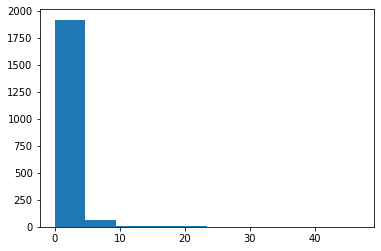

In [137]:
plt.hist(ra1_test)
plt.show()
#print(max(cn4_test), min(cn4_test))

In [255]:
cn1_train = []
ra1_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    a, b = CaculateSim_1(node_a,node_b)
    cn1_train.append(a)
    ra1_train.append(b)

In [256]:
cn2_train = []
ra2_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    a, b = CaculateSim_1(node_a,node_b)
    cn2_train.append(a)
    ra2_train.append(b)

In [257]:
cn3_train = []
ra3_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    a, b = CaculateSim_1(node_a,node_b)
    cn3_train.append(a)
    ra3_train.append(b)

In [258]:
cn4_train = []
ra4_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    a, b = CaculateSim_1(node_a,node_b)
    cn4_train.append(a)
    ra4_train.append(b)

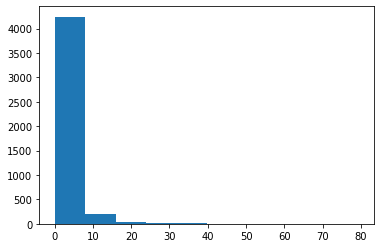

In [259]:
plt.hist(ra4_train)
plt.show()

In [16]:
#randomwalk
walk_test = []

for node in node_test:
    node_a = node[0]
    node_b = node[1]
    walk = pathwalk(NG, source=node_a, target=node_b, weight=None, method='dijkstra')
    walk_test.append(walk)

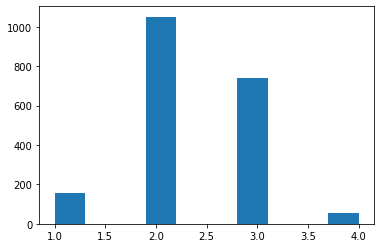

In [17]:
plt.hist(walk_test)
plt.show()  #一定要被归一化才行

In [260]:
walk_train = []

for node in node_train:
    node_a = node[0]
    node_b = node[1]
    walk = pathwalk(NG, source=node_a, target=node_b, weight=None, method='dijkstra')
    walk_train.append(walk)

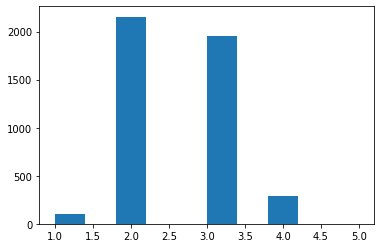

In [261]:
plt.hist(walk_train)
plt.show() 

In [262]:
train_all = pd.DataFrame({'from':Train['from'] ,'in':Train['in'] ,\
                          'cn1':cn1_train,'cn2':cn2_train,'cn3':cn3_train,'cn4':cn4_train,\
                          'ra1':ra1_train,'ra2':ra2_train,'ra3':ra3_train,'ra4':ra4_train, \
                          'walk':walk_train, 'label':Train['label']})
test_df = pd.DataFrame({'from':Test['source'] ,'in':Test['sink'] ,\
                        'cn1':cn1_test,'cn2':cn2_test,'cn3':cn3_test,'cn4':cn4_test,\
                        'ra1':ra1_test,'ra2':ra2_test,'ra3':ra3_test,'ra4':ra4_test,\
                       'walk':walk_test})
print(test_df)
print(train_all)

         from       in  cn1  cn2  cn3  cn4       ra1  ra2  ra3      ra4  walk
0     3563811  3600160    0    0    0    0  0.000000  0.0  0.0  0.00000     3
1     2052043  1401960    0    0    0    0  0.000000  0.0  0.0  0.00000     3
2     4517994  1690636    2    0    0    2  0.304319  0.0  0.0  0.30346     2
3     1660006  4349447    2    0    0    2  0.178380  0.0  0.0  0.17838     2
4      581111  1882617    0    0    0    0  0.000000  0.0  0.0  0.00000     3
...       ...      ...  ...  ...  ...  ...       ...  ...  ...      ...   ...
1995  1461386  2341683    0    0    0    0  0.000000  0.0  0.0  0.00000     3
1996  4057755  1871227    1    0    0    0  0.100384  0.0  0.0  0.00000     2
1997  4242514  1413468    0    0    0    0  0.000000  0.0  0.0  0.00000     3
1998   555531  1290080    0    0    0    0  0.000000  0.0  0.0  0.00000     3
1999  1707829  2373045    0    0    0    0  0.000000  0.0  0.0  0.00000     3

[2000 rows x 11 columns]
         from       in  cn1  cn2  cn3 

In [263]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_all, test_size=0.2, random_state=1)

In [264]:
X_train = train_df.drop("label", axis=1)
Y_train = train_df["label"]
X_valid = valid_df.drop("label", axis=1)
Y_valid = valid_df["label"]
X_valid.columns

Index(['from', 'in', 'cn1', 'cn2', 'cn3', 'cn4', 'ra1', 'ra2', 'ra3', 'ra4',
       'walk'],
      dtype='object')

In [265]:
sc = MinMaxScaler()

features = ['cn1', 'cn2', 'cn3', 'cn4', 'ra1', 'ra2', 'ra3', 'ra4','walk']

X_train = sc.fit_transform(train_df[features]) 

X_valid = sc.fit_transform(valid_df[features])

In [266]:
X_train

array([[0.01310044, 0.01310044, 0.01310044, ..., 0.01152537, 0.01152537,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.52110626, 0.52110626, 0.52110626, ..., 0.49960308, 0.49960308,
        0.25      ],
       ...,
       [0.01746725, 0.01746725, 0.01746725, ..., 0.01331841, 0.01331841,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.0363901 , 0.0363901 , 0.0363901 , ..., 0.02966355, 0.02966355,
        0.25      ]])

In [267]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


89.86

In [268]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier

89.86

In [269]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier #99.84

94.33

In [270]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier #100

96.19

In [271]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier #100

96.47

In [272]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89.86

In [274]:
from xgboost import XGBClassifier
classifier = XGBClassifier(probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier 

[15:05:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { probability } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




95.31

In [275]:
X = train_all.drop("label", axis=1)
Y = train_all["label"]

features = ['cn1', 'cn2', 'cn3', 'cn4', 'ra1', 'ra2', 'ra3', 'ra4','walk']

sc = MinMaxScaler()

X = sc.fit_transform(X[features]) 
X_test = sc.fit_transform(test_df[features]) 
len(X)

4500

In [276]:
from xgboost import XGBClassifier
classifier = XGBClassifier(probability = True)
classifier.fit(X, Y)
Y_pred = classifier.predict_proba(X_test)

[15:05:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { probability } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




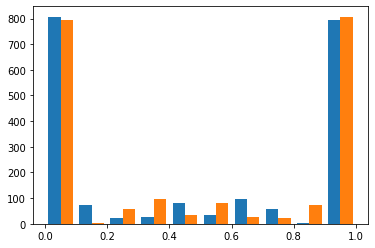

In [277]:
plt.hist(Y_pred)
plt.show()

In [278]:
Y_pred

array([[0.9969955 , 0.00300448],
       [0.9969955 , 0.00300448],
       [0.107207  , 0.892793  ],
       ...,
       [0.9969955 , 0.00300448],
       [0.9969955 , 0.00300448],
       [0.9969955 , 0.00300448]], dtype=float32)

In [279]:
pred = []

for a in Y_pred:
    pred.append(a[1])

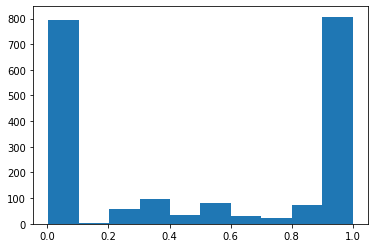

In [280]:
plt.hist(pred)
plt.show()

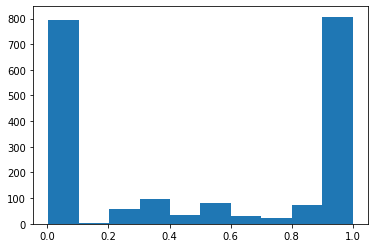

In [282]:
plt.hist(ar)
plt.show()

In [281]:
ar = np.array(pred)
len(ar[ar<0.5]) 

987

In [131]:
ID = list(Test["Id"])

In [198]:
submission = pd.DataFrame({"Id": ID,"Predicted": pred})

In [199]:
submission.head(100)

,Id,Predicted
0,1,0.003004
1,2,0.003004
2,3,0.892793
3,4,0.530311
4,5,0.003004
...,...,...
95,96,0.003004
96,97,0.998962
97,98,0.997472
98,99,0.003004


In [200]:
submission.to_csv('/Users/mac/Desktop/Project1/sbm9.csv', index = False, header = True)